No. of subarrays with sum exactly k odds,    
Exactly k different elements,   


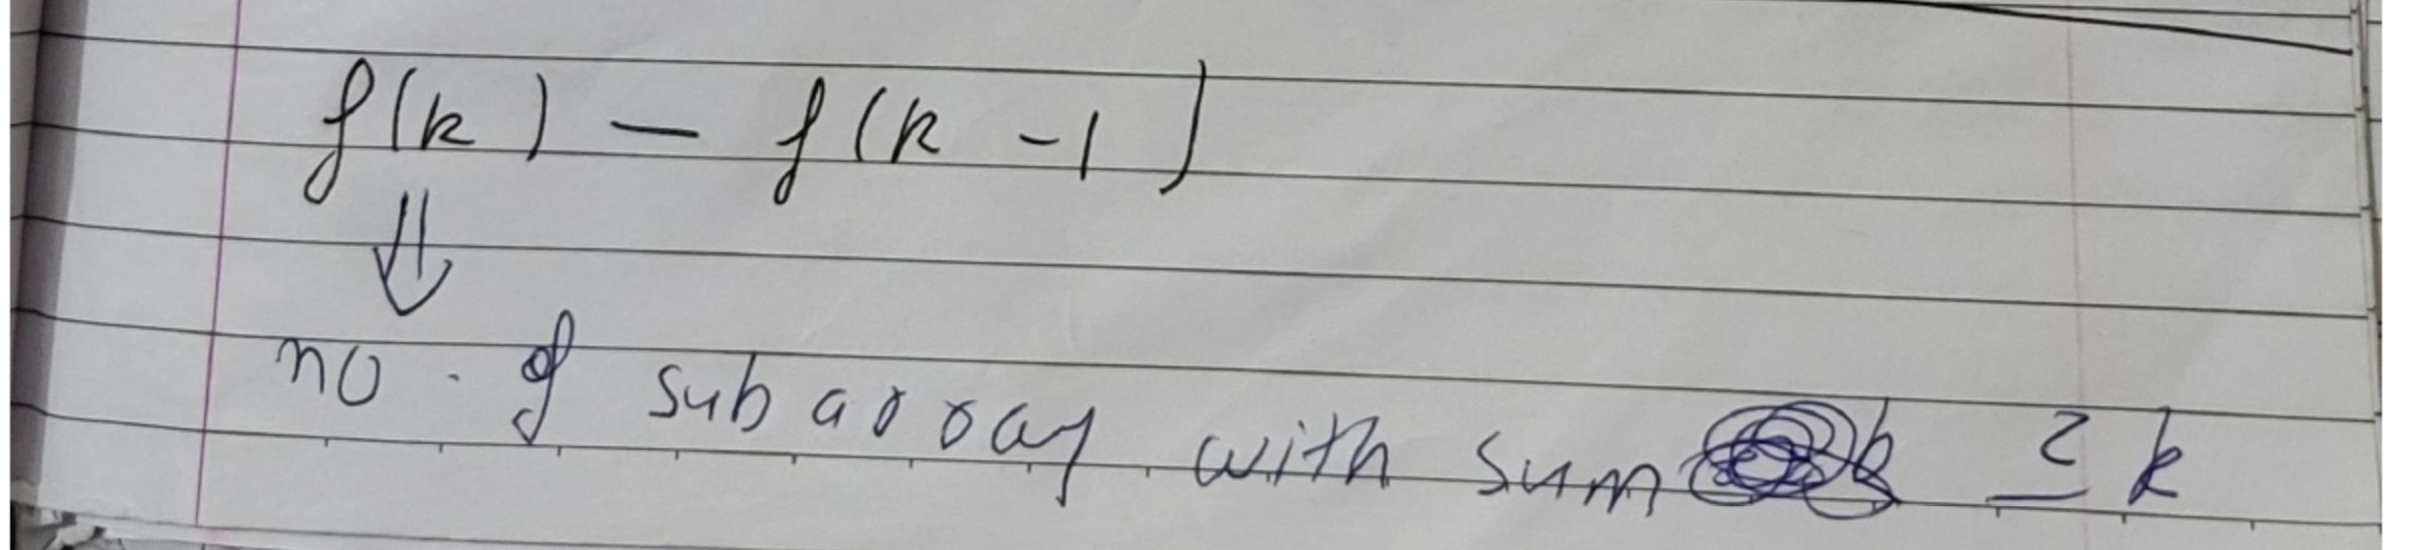

# way 2 of solving

No. of subarrays with sum exactly k odds,  

Unordered_map with transformation

In [ ]:
int f(vector<int>& v, int k) {
    int ans=0;
    int n=v.size();
    unordered_map<int,int> um;
    um[0]=1;
    //to help us considering subarrays starting from 0 idx
    int ps=0;
    for(int x: v){
        ps+=x;
        ans+=um[ps-k];
        um[ps]++;
    }
    return ans;
}

int numberOfSubarrays(vector<int>& v, int k) {
    for(int &x: v) x=x%2?1:0;
    //now the problem have become no. of subarray whose sum is exactly k
    //this is a traditional unordered_map problem 
    return f(v,k);
}

# Way 3, purely with two pointers

Largest subarray having sum exactly k

if negatives were not allowed

In [ ]:
class Solution {
    public:
        int maxSubArrayLen(vector<int>& v, int k) {
            int n=v.size();
            int l=0,h=0;
            int sum=0;
            int ans=0;
            while(h<n){
                sum+=v[h];
                if(sum==k){
                    ans=max(ans, h-l+1);
                }
                while(sum>k and l<h){
                    sum-=v[l];
                    l++;
                    if(sum==k){
                        ans=max(ans,h-l+1);
                    }
                }
                h++;
            }
            return ans;
        }
    };

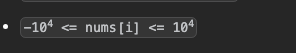

https://leetcode.com/problems/maximum-size-subarray-sum-equals-k/

In [ ]:
class Solution {
    public:
        int maxSubArrayLen(vector<int>& v, int k) {
            int n=v.size();
            int ans=0;
            unordered_map<int, int> um;
            um[0]=-1;// will help in calculation of len, you will see it later
            long ps=0;
            for(int i=0;i<n;i++){
                ps+=v[i];
                if(um.count(ps-k)){
                    ans=max(ans, i-(um[ps-k]+1)+1); //r-l+1
                }
                if(!um.count(ps)){
                    //We want the window to be as big as possible
                    um[ps]=i;
                }
            }
            return ans;
        }
    };

Exactly k different elements,   

In [ ]:

int subarraysWithKDistinct(vector<int>& v, int k) {
    int n=v.size();
    int l = 0, h = 0;
    int ans=0;
    unordered_map<int,int> m;
    while(h < n) {
        m[v[h]]++;
        while (m.size()>k and l < h) {
            m[v[l]]--;
            if(m[v[l]]==0) m.erase(v[l]);
            l++;          
        }
        if (m.size() == k){
            ans++;
        } 
        h++;
    }
    return ans;
}